# CDC Wonder Data Exploration

## Import Libraries

In [218]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm

#import statsmodels.stats.multicomp as multi
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

%matplotlib inline



## Import & Subset Data

### HHS Region 1: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont 

In [236]:
# import desired columns and set data types
region1 = pd.read_csv('Region1.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region1.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region1['pct_tot_deaths'] = region1['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region1['HHS_region'] = '1'
#print(region1)

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region1_wave1 = region1[region1.year < 2010]
region1_wave2 = region1[(region1.year > 2009) & (region1.year < 2013)]
region1_wave3 = region1[region1.year > 2012]


#print(region1_wave1)
#print(region1_wave2)
print(region1_wave3)



    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
14  2013     253  14618806      1.7           0.018          1
15  2014     863  14680722      6.1           0.062          1
16  2015    1733  14727584     12.4           0.125          1
17  2016    2849  14735525     20.5           0.206          1
18  2017    3264  14810001     23.1           0.236          1
19  2018    3510  14853290     24.9           0.254          1


### HHS Region 2: New Jersey, New York

In [176]:
# import desired columns and set data types
region2 = pd.read_csv('Region2.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region2.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region2['pct_tot_deaths'] = region2['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region2['HHS_region'] = '2'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region2_wave1 = region2[region2.year < 2010]
region2_wave2 = region2[(region2.year > 2009) & (region2.year < 2013)]
region2_wave3 = region2[region2.year > 2012]
print(region2_wave1)
print(region2_wave2)
print(region2_wave3)



    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
0   1999      41  27242317      0.2           0.003          2
1   2000      35  27390807      0.1           0.003          2
2   2001      64  27575509      0.2           0.005          2
3   2002      56  27690443      0.2           0.004          2
4   2003      58  27777341      0.2           0.004          2
5   2004      39  27806128      0.1           0.003          2
6   2005      45  27784584      0.2           0.003          2
7   2006     175  27766310      0.6           0.013          2
8   2007     147  27810220      0.5           0.011          2
9   2008     139  27923526      0.5           0.010          2
10  2009     179  28062668      0.6           0.013          2
    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
11  2010     208  28169996      0.7           0.015          2
12  2011     186  28286352      0.6           0.014          2
13  2012     201  28434851      0.7           0.015    

### HHS Region 3: Delaware, District of Columbia, Maryland, Pennsylvania, Virginia, West Virginia 


In [177]:
# import desired columns and set data types
region3 = pd.read_csv('Region3.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region3.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region3['pct_tot_deaths'] = region3['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region3['HHS_region'] = '3'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region3_wave1 = region3[region3.year < 2010]
region3_wave2 = region3[(region3.year > 2009) & (region3.year < 2013)]
region3_wave3 = region3[region3.year > 2012]
print(region3_wave1)
print(region3_wave2)
print(region3_wave3)



    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
0   1999      65  27675490      0.2           0.003          3
1   2000      81  27820058      0.3           0.004          3
2   2001     106  28043707      0.4           0.005          3
3   2002     144  28243034      0.5           0.007          3
4   2003     173  28436704      0.6           0.008          3
5   2004     239  28648227      0.8           0.011          3
6   2005     182  28852252      0.6           0.009          3
7   2006     273  29069762      1.0           0.013          3
8   2007     270  29248550      0.9           0.013          3
9   2008     314  29435166      1.1           0.015          3
10  2009     297  29654916      1.0           0.014          3
    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
11  2010     355  29829606      1.2           0.017          3
12  2011     356  30048274      1.2           0.017          3
13  2012     348  30238794      1.2           0.017    

### HHS Region 4: Alabama, Florida, Georgia, Kentucky, Mississippi, North Carolina, South Carolina, Tennessee 

In [178]:
# import desired columns and set data types
region4 = pd.read_csv('Region4.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region4.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region4['pct_tot_deaths'] = region4['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region4['HHS_region'] = '4'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region4_wave1 = region4[region4.year < 2010]
region4_wave2 = region4[(region4.year > 2009) & (region4.year < 2013)]
region4_wave3 = region4[region4.year > 2012]
print(region4_wave1)
print(region4_wave2)
print(region4_wave3)



    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
0   1999     143  52644737      0.3           0.006          4
1   2000     197  53252966      0.4           0.008          4
2   2001     246  54148670      0.5           0.010          4
3   2002     307  54856185      0.6           0.012          4
4   2003     402  55536461      0.7           0.016          4
5   2004     457  56425292      0.8           0.018          4
6   2005     458  57393064      0.8           0.018          4
7   2006     481  58439884      0.8           0.019          4
8   2007     514  59313566      0.9           0.020          4
9   2008     551  60073894      0.9           0.021          4
10  2009     679  60652733      1.1           0.026          4
    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
11  2010     661  61082315      1.1           0.026          4
12  2011     603  61762344      1.0           0.023          4
13  2012     593  62356916      0.9           0.023    

### HHS Region 5: Illinois, Indiana, Michigan, Minnesota, Ohio, Wisconsin 

In [179]:
# import desired columns and set data types
region5 = pd.read_csv('Region5.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region5.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region5['pct_tot_deaths'] = region5['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region5['HHS_region'] = '5'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region5_wave1 = region5[region5.year < 2010]
region5_wave2 = region5[(region5.year > 2009) & (region5.year < 2013)]
region5_wave3 = region5[region5.year > 2012]
print(region5_wave1)
print(region5_wave2)
print(region5_wave3)



    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
0   1999      99  49842706      0.2           0.004          5
1   2000     116  50074516      0.2           0.004          5
2   2001     154  50384360      0.3           0.005          5
3   2002     182  50569219      0.4           0.006          5
4   2003     193  50761359      0.4           0.007          5
5   2004     248  50932085      0.5           0.009          5
6   2005     347  51068740      0.7           0.012          5
7   2006     831  51235128      1.6           0.029          5
8   2007     412  51395195      0.8           0.015          5
9   2008     401  51522138      0.8           0.014          5
10  2009     471  51637057      0.9           0.017          5
    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
11  2010     526  51725489      1.0           0.019          5
12  2011     468  51863945      0.9           0.017          5
13  2012     433  51945711      0.8           0.015    

### HHS Region 6: Arkansas, Louisiana, New Mexico, Oklahoma, Texas 

In [180]:
# import desired columns and set data types
region6 = pd.read_csv('Region6.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region6.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region6['pct_tot_deaths'] = region6['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region6['HHS_region'] = '6'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region6_wave1 = region6[region6.year < 2010]
region6_wave2 = region6[(region6.year > 2009) & (region6.year < 2013)]
region6_wave3 = region6[region6.year > 2012]
print(region6_wave1)
print(region6_wave2)
print(region6_wave3)



    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
0   1999     109  32916120      0.3           0.017          6
1   2000     104  33263896      0.3           0.016          6
2   2001     126  33787858      0.4           0.020          6
3   2002     188  34237908      0.6           0.030          6
4   2003     175  34659255      0.5           0.028          6
5   2004     198  35124988      0.6           0.031          6
6   2005     187  35616719      0.5           0.030          6
7   2006     225  36040233      0.6           0.036          6
8   2007     252  36680633      0.7           0.040          6
9   2008     231  37298817      0.6           0.036          6
10  2009     426  37944626      1.1           0.067          6
    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
11  2010     361  38405381      0.9           0.057          6
12  2011     266  39061228      0.7           0.042          6
13  2012     304  39510585      0.8           0.048    

### HHS Region 7: Iowa, Kansas, Missouri, Nebraska

In [181]:
# import desired columns and set data types
region7 = pd.read_csv('Region7.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region7.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region7['pct_tot_deaths'] = region7['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region7['HHS_region'] = '7'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region7_wave1 = region7[region7.year < 2010]
region7_wave2 = region7[(region7.year > 2009) & (region7.year < 2013)]
region7_wave3 = region7[region7.year > 2012]
print(region7_wave1)
print(region7_wave2)
print(region7_wave3)



    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
0   1999      33  12862684      0.3           0.008          7
1   2000      46  12921216      0.4           0.010          7
2   2001      62  12995137      0.5           0.014          7
3   2002      66  13050886      0.5           0.015          7
4   2003      58  13113049      0.5           0.013          7
5   2004      88  13185119      0.7           0.020          7
6   2005      79  13261550      0.6           0.018          7
7   2006     182  13360972      1.4           0.042          7
8   2007     112  13454049      0.9           0.026          7
9   2008     104  13545104      0.8           0.024          7
10  2009     148  13639345      1.1           0.034          7
    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
11  2010     173  13714741      1.3           0.039          7
12  2011     126  13786876      0.9           0.029          7
13  2012     145  13837604      1.1           0.033    

### HHS Region 8: Colorado, Montana, North Dakota, South Dakota, Utah, Wyoming 

In [182]:
# import desired columns and set data types
region8 = pd.read_csv('Region8.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region8.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region8['pct_tot_deaths'] = region8['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region8['HHS_region'] = '8'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region8_wave1 = region8[region8.year < 2010]
region8_wave2 = region8[(region8.year > 2009) & (region8.year < 2013)]
region8_wave3 = region8[region8.year > 2012]
print(region8_wave1)
print(region8_wave2)
print(region8_wave3)



    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
0   1999      38   9213458      0.4           0.015          8
1   2000      41   9327451      0.5           0.017          8
2   2001      33   9508054      0.4           0.013          8
3   2002      61   9625093      0.6           0.025          8
4   2003      61   9714498      0.6           0.025          8
5   2004      55   9830809      0.6           0.022          8
6   2005      90   9965448      0.9           0.037          8
7   2006      77  10153744      0.8           0.031          8
8   2007      99  10345641      1.0           0.040          8
9   2008     106  10531910      1.0           0.043          8
10  2009     168  10711484      1.6           0.068          8
    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
11  2010     133  10832893      1.2           0.054          8
12  2011     165  11008389      1.5           0.067          8
13  2012     138  11157404      1.2           0.056    

### HHS Region 9: Arizona, California, Hawaii, Nevada

In [183]:
# import desired columns and set data types
region9 = pd.read_csv('Region9.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region9.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region9['pct_tot_deaths'] = region9['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region9['HHS_region'] = '9'

# subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region9_wave1 = region9[region9.year < 2010]
region9_wave2 = region9[(region9.year > 2009) & (region9.year < 2013)]
region9_wave3 = region9[region9.year > 2012]
print(region9_wave1)
print(region9_wave2)
print(region9_wave3)



    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
0   1999     131  41668045      0.3           0.020          9
1   2000     101  42212074      0.3           0.015          9
2   2001      72  43077282      0.2           0.011          9
3   2002     168  43681502      0.4           0.026          9
4   2003     158  44263527      0.4           0.024          9
5   2004     197  44846771      0.4           0.030          9
6   2005     189  45391892      0.4           0.029          9
7   2006     235  45882732      0.5           0.036          9
8   2007     201  46334739      0.4           0.031          9
9   2008     233  46870542      0.5           0.035          9
10  2009     301  47335765      0.6           0.046          9
    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
11  2010     318  47706825      0.6           0.048          9
12  2011     256  48272549      0.5           0.039          9
13  2012     214  48745929      0.4           0.033    

### HHS Region 10: Alaska, Idaho, Oregon, Washington 

In [184]:
# import desired columns and set data types
region10 = pd.read_csv('Region10.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region10.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region10['pct_tot_deaths'] = region10['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region10['HHS_region'] = '10'

# subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region10_wave1 = region10[region10.year < 2010]
region10_wave2 = region10[(region10.year > 2009) & (region10.year < 2013)]
region10_wave3 = region10[region10.year > 2012]

#print(region10_wave1)
#print(region10_wave2)
print(region10_wave3)



    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
14  2013     112  13248739      0.8           0.049         10
15  2014     122  13402965      0.9           0.054         10
16  2015     128  13592690      0.9           0.057         10
17  2016     165  13806499      1.2           0.073         10
18  2017     286  14005257      2.1           0.126         10
19  2018     365  14217950      2.6           0.161         10


### Combine All Regional Data sets into 1 with Region column

In [196]:
# Rework data into one giant dataframe with a column for region
# Stack the DataFrames on top of each other
all_regions_wave3 = pd.concat([region1_wave3, region2_wave3, region3_wave3, region4_wave3, region5_wave3, region6_wave3, region7_wave3, region8_wave3, region9_wave3, region10_wave3], axis=0) # verticle stack of rows in each dataframe
all_regions_wave3['HHS_region'] = all_regions_wave3['HHS_region'].astype('category')

#reset the index after combining
all_regions_wave3.reset_index(drop=True)

print(all_regions_wave3)

    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
14  2013     253  14618806      1.7           0.018          1
15  2014     863  14680722      6.1           0.062          1
16  2015    1733  14727584     12.4           0.125          1
17  2016    2849  14735525     20.5           0.206          1
18  2017    3264  14810001     23.1           0.236          1
19  2018    3510  14853290     24.9           0.254          1
14  2013     266  28550466      0.9           0.020          2
15  2014     405  28684402      1.4           0.030          2
16  2015     911  28753804      3.2           0.067          2
17  2016    2332  28689758      8.2           0.173          2
18  2017    3614  28855043     12.6           0.267          2
19  2018    4415  28450729     15.7           0.327          2
14  2013     452  30389522      1.5           0.022          3
15  2014     785  30534738      2.6           0.038          3
16  2015    1337  30654187      4.4           0.064    

## Descriptive Statistics and Data Exploration

### HHS Region 1 - Wave 3

#### Descriptive Statistics

In [41]:
region1_stats = region1_wave3.describe(include="all")
print(region1_stats)



# boxplot -- Need to figure out how to do subplots
#plt.figure(figsize=(6,5))
#fig, axs = plt.subplots()
#sns.boxplot(x='deaths', data=region1)
#sns.boxplot(x='aa_rate', data=region1)
#axs = sns.boxplot(x='pct_tot_deaths', data=region1)
#ax = sns.boxplot(x='pop', data=region1, ax=axs[3])
#region1_wave1_stats = region1_wave1.describe(include="all")
#print(region1_wave1_stats)

              year    r1_deaths        r1_pop  r1_aa_rate  r1_pct_tot_deaths
count     6.000000     6.000000  6.000000e+00    6.000000           6.000000
mean   2015.500000  2078.666667  1.473765e+07   14.783333           0.150167
std       1.870829  1339.965174  8.494446e+04    9.554563           0.097099
min    2013.000000   253.000000  1.461881e+07    1.700000           0.018000
25%    2014.250000  1080.500000  1.469244e+07    7.675000           0.077750
50%    2015.500000  2291.000000  1.473155e+07   16.450000           0.165500
75%    2016.750000  3160.250000  1.479138e+07   22.450000           0.228500
max    2018.000000  3510.000000  1.485329e+07   24.900000           0.254000


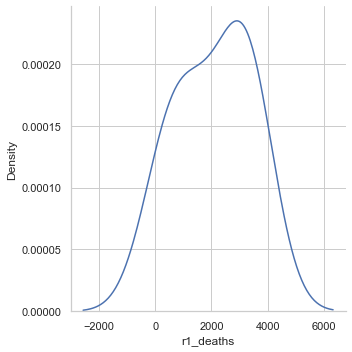

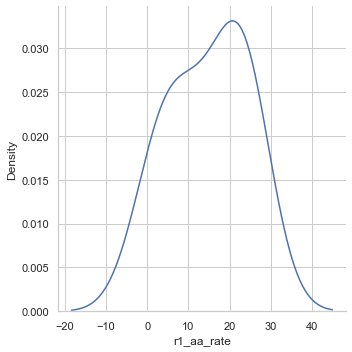

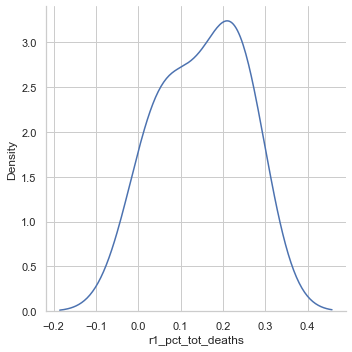

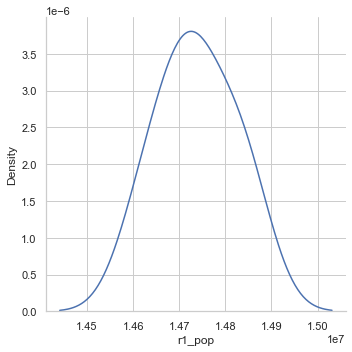

In [42]:
# histograms
sns.set_style("whitegrid")
sns.displot(region1_wave3, x="r1_deaths", kind="kde")
sns.displot(region1_wave3, x="r1_aa_rate", kind="kde")
sns.displot(region1_wave3, x="r1_pct_tot_deaths", kind="kde")
sns.displot(region1_wave3, x="r1_pop", kind="kde")

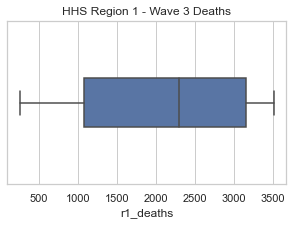

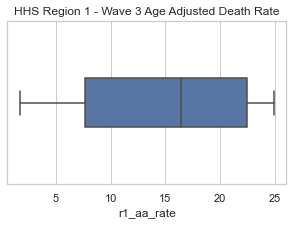

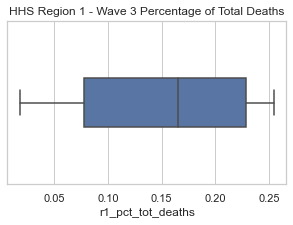

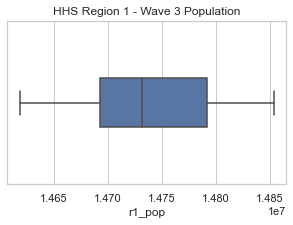

In [43]:
# boxplots
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.boxplot(x='r1_deaths', data=region1_wave3, width=0.3).set_title('HHS Region 1 - Wave 3 Deaths')

fig, ax = plt.subplots(figsize=(5,3))
ax = sns.boxplot(x='r1_aa_rate', data=region1_wave3, width=0.3).set_title('HHS Region 1 - Wave 3 Age Adjusted Death Rate')


fig, ax = plt.subplots(figsize=(5,3))
ax = sns.boxplot(x='r1_pct_tot_deaths', data=region1_wave3, width=0.3).set_title('HHS Region 1 - Wave 3 Percentage of Total Deaths')


fig, ax = plt.subplots(figsize=(5,3))
ax = sns.boxplot(x='r1_pop', data=region1_wave3, width=0.3).set_title('HHS Region 1 - Wave 3 Population')




#### Shapiro-Wilks Test for Normality of Model Residuals?

### Age Adjusted Death Rates


In [206]:
# try tukey with groupby
# MultiComp = MultiComparison(stacked_data['result'],stacked_data['treatment'])
mult_comp = multi.MultiComparison(all_regions_wave3['aa_rate'], all_regions_wave3['HHS_region'])
print (mult_comp.tukeyhsd())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1     10 -13.3667 0.0012 -23.0411 -3.6923   True
     1      2  -7.7833  0.217 -17.4577  1.8911  False
     1      3  -4.9667 0.7651 -14.6411  4.7077  False
     1      4  -9.5167 0.0574 -19.1911  0.1577  False
     1      5     -7.0 0.3514 -16.6744  2.6744  False
     1      6    -13.5 0.0011 -23.1744 -3.8256   True
     1      7 -11.0333 0.0141 -20.7077 -1.3589   True
     1      8 -13.0667 0.0017 -22.7411 -3.3923   True
     1      9 -13.5333  0.001 -23.2077 -3.8589   True
    10      2   5.5833 0.6421  -4.0911 15.2577  False
    10      3      8.4 0.1402  -1.2744 18.0744  False
    10      4     3.85    0.9  -5.8244 13.5244  False
    10      5   6.3667 0.4855  -3.3077 16.0411  False
    10      6  -0.1333    0.9  -9.8077  9.5411  False
    10      7   2.3333    0.9  -7.3411 12.0077  False
    10      8      0.3    0.

#### What do the results Tukeys Honestly Significant difference mean?
True means reject the null hypothesis - no statistically significant differences

False means failt to reject the null hypothesis - There is a statistically significant difference

## One Way ANOVA Using OLS Model

In [237]:
model = ols('aa_rate ~ C(HHS_region)', all_regions_wave3).fit()
model.summary()
#print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")Tu
# create ANOVA table
res = sm.stats.anova_lm(model, typ=2)
res

,sum_sq,df,F,PR(>F)
C(HHS_region),1092.824000,9.0,4.738594,0.000142
Residual,1281.233333,50.0,NaN,NaN


### Post Hoc Analysis Tukey's HSD

In [234]:
mc = MultiComparison(all_regions_wave3['aa_rate'],all_regions_wave3['HHS_region'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1     10 -13.3667 0.0012 -23.0411 -3.6923   True
     1      2  -7.7833  0.217 -17.4577  1.8911  False
     1      3  -4.9667 0.7651 -14.6411  4.7077  False
     1      4  -9.5167 0.0574 -19.1911  0.1577  False
     1      5     -7.0 0.3514 -16.6744  2.6744  False
     1      6    -13.5 0.0011 -23.1744 -3.8256   True
     1      7 -11.0333 0.0141 -20.7077 -1.3589   True
     1      8 -13.0667 0.0017 -22.7411 -3.3923   True
     1      9 -13.5333  0.001 -23.2077 -3.8589   True
    10      2   5.5833 0.6421  -4.0911 15.2577  False
    10      3      8.4 0.1402  -1.2744 18.0744  False
    10      4     3.85    0.9  -5.8244 13.5244  False
    10      5   6.3667 0.4855  -3.3077 16.0411  False
    10      6  -0.1333    0.9  -9.8077  9.5411  False
    10      7   2.3333    0.9  -7.3411 12.0077  False
    10      8      0.3    0.

### Normality Assumption Checks

#### Shapiro Wilk Test

In [223]:
### Normality Assumption check
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

#From the above snippet of code, we see that the p-value is >0.05 for all density groups. Hence, we can conclude that they follow the Gaussian Distribution.

0.9637197256088257 0.07162781059741974


#### Q-Q Plot

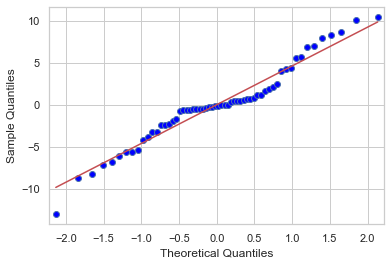

In [226]:
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

#From the above figure, we see that all data points lie to close to the 45-degree line and hence we can conclude that it follows Normal Distribution.

### Homogeneity of Variance Assumption Check

In [230]:
# Lavene Variance Test
stats.levene(all_regions_wave3['HHS_region']=='1',all_regions_wave3['HHS_region']=='2',all_regions_wave3['HHS_region']=='3', all_regions_wave3['HHS_region']=='4', all_regions_wave3['HHS_region']=='5',all_regions_wave3['HHS_region']=='6', all_regions_wave3['HHS_region']=='7', all_regions_wave3['HHS_region']=='8',all_regions_wave3['HHS_region']=='9',all_regions_wave3['HHS_region']=='10')

#We see that p-value >0.05 for all density groups. Hence, we can conclude that groups have equal variances.

LeveneResult(statistic=0.0, pvalue=1.0)

# Other Interesting Stuff

In [256]:
#print(all_regions_wave3)
all_regions_wave3.sort_values(['aa_rate'], ascending=False)

#gb_region = all_regions_wave3.groupby('HHS_region')
#gb_region.head()

,year,deaths,pop,aa_rate,pct_tot_deaths,HHS_region
19,2018,3510,14853290,24.9,0.254,1
18,2017,3264,14810001,23.1,0.236,1
17,2016,2849,14735525,20.5,0.206,1
19,2018,6095,30842921,20.3,0.292,3
18,2017,5321,30799502,17.8,0.255,3
19,2018,4415,28450729,15.7,0.327,2
18,2017,7403,52461850,14.8,0.262,5
19,2018,7284,52543062,14.6,0.258,5
18,2017,3614,28855043,12.6,0.267,2
16,2015,1733,14727584,12.4,0.125,1


# Export to CSV for Tableau

In [259]:
print(all_regions_wave3)
all_regions_wave3.to_csv('wave3.csv', index=False)

    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
14  2013     253  14618806      1.7           0.018          1
15  2014     863  14680722      6.1           0.062          1
16  2015    1733  14727584     12.4           0.125          1
17  2016    2849  14735525     20.5           0.206          1
18  2017    3264  14810001     23.1           0.236          1
19  2018    3510  14853290     24.9           0.254          1
14  2013     266  28550466      0.9           0.020          2
15  2014     405  28684402      1.4           0.030          2
16  2015     911  28753804      3.2           0.067          2
17  2016    2332  28689758      8.2           0.173          2
18  2017    3614  28855043     12.6           0.267          2
19  2018    4415  28450729     15.7           0.327          2
14  2013     452  30389522      1.5           0.022          3
15  2014     785  30534738      2.6           0.038          3
16  2015    1337  30654187      4.4           0.064    

# PARKING LOT JUNK

## One-Way ANOVA TEST

### Total Deaths

### Combine Wave 3 Dataframes for Each Region

In [195]:
# Testing GroupBy Region
print(all_regions_wave3)

gb_region = all_regions_wave3.groupby('HHS_region')
gb_region.tail()


    year  deaths       pop  aa_rate  pct_tot_deaths HHS_region
14  2013     253  14618806      1.7           0.018          1
15  2014     863  14680722      6.1           0.062          1
16  2015    1733  14727584     12.4           0.125          1
17  2016    2849  14735525     20.5           0.206          1
18  2017    3264  14810001     23.1           0.236          1
19  2018    3510  14853290     24.9           0.254          1
14  2013     266  28550466      0.9           0.020          2
15  2014     405  28684402      1.4           0.030          2
16  2015     911  28753804      3.2           0.067          2
17  2016    2332  28689758      8.2           0.173          2
18  2017    3614  28855043     12.6           0.267          2
19  2018    4415  28450729     15.7           0.327          2
14  2013     452  30389522      1.5           0.022          3
15  2014     785  30534738      2.6           0.038          3
16  2015    1337  30654187      4.4           0.064    

,year,deaths,pop,aa_rate,pct_tot_deaths,HHS_region
15,2014,863,14680722,6.1,0.062,1
16,2015,1733,14727584,12.4,0.125,1
17,2016,2849,14735525,20.5,0.206,1
18,2017,3264,14810001,23.1,0.236,1
19,2018,3510,14853290,24.9,0.254,1
15,2014,405,28684402,1.4,0.030,2
16,2015,911,28753804,3.2,0.067,2
17,2016,2332,28689758,8.2,0.173,2
18,2017,3614,28855043,12.6,0.267,2
19,2018,4415,28450729,15.7,0.327,2


In [117]:
# Create New Data Frame With All Age Adjusted Deaths Rates - Column for Each Region
#region1_wave3
#print(region1_wave3)
#print(region2_wave3)
#print(region3_wave3)
print(region4_wave3)
#pd.concat([df1,df2],axis=1,join='inner')
#indexed_region2_wave3 = region2_wave3.set_index('year')
#combo_df = pd.merge([region1_wave3,region2_wave3],left_on='year', right=True)

# join 2 dataframes -- this works!
#combo_df = region1_wave3.join(region2_wave3.set_index('year'), on='year')

#test - combine 3 dataframes - this works too!
#allregions_df = region1_wave3.join(region2_wave3.set_index('year'), on='year').join(region3_wave3.set_index('year'), on='year').join(region4_wave3.set_index('year'), on="year")
#allregions_df.head()

# keep year the same, rename coloumns r1_aa_rate etc.

    year  r4_deaths    r4_pop  r4_aa_rate  r4_pct_tot_deaths
14  2013        675  62884128         1.1              0.026
15  2014       1227  63573351         2.0              0.047
16  2015       2035  64301783         3.3              0.079
17  2016       3744  64970911         6.1              0.145
18  2017       5882  65740587         9.5              0.227
19  2018       6010  66399360         9.6              0.232


In [166]:
# run Tukey HSD
#tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
#                          groups=voter_race,   # Groups
#                          alpha=0.05) 

# create 1 dataframe with new column for re
combo_aa_rate_df = pd.DataFrame()
combo_aa_rate_df['r1'] = r1_aa_rate
combo_aa_rate_df['r2'] = r2_aa_rate
combo_aa_rate_df['r3'] = r3_aa_rate
combo_aa_rate_df['r4'] = r4_aa_rate
combo_aa_rate_df['r5'] = r5_aa_rate
combo_aa_rate_df['r6'] = r6_aa_rate
combo_aa_rate_df['r7'] = r7_aa_rate
combo_aa_rate_df['r8'] = r8_aa_rate
combo_aa_rate_df['r9'] = r9_aa_rate
combo_aa_rate_df['r10'] = r10_aa_rate

print(combo_aa_rate_df)
# Stack the data (and rename columns)
#stacked_data = combo_aa_rate_df.stack().reset_index()
#stacked_data = combo_aa_rate_df.rename(columns={'level_0': 'id',
#                                            'level_1': 'treatment',
 #                                           0:'result'})

# Tukey's HSD
#mc = multi(combo_aa_rate_df['r1'],combo_aa_rate_df['r2'])
#mc_results = mc.tukeyhsd()
#print(mc_results)    

      r1    r2    r3   r4    r5   r6   r7   r8   r9  r10
14   1.7   0.9   1.5  1.1   0.9  0.7  1.3  1.2  0.5  0.8
15   6.1   1.4   2.6  2.0   2.2  0.9  1.4  1.7  0.6  0.9
16  12.4   3.2   4.4  3.3   4.5  1.0  2.0  1.4  0.7  0.9
17  20.5   8.2  12.3  6.1   9.7  1.3  4.1  1.7  1.1  1.2
18  23.1  12.6  17.8  9.5  14.8  1.8  5.9  2.2  1.7  2.1
19  24.9  15.7  20.3  9.6  14.6  2.0  7.8  2.1  2.9  2.6


TypeError: 'module' object is not callable

In [161]:
r1_aa_rate = region1_wave3['aa_rate']
r2_aa_rate = region2_wave3['aa_rate']
r3_aa_rate = region3_wave3['aa_rate']
r4_aa_rate = region4_wave3['aa_rate']
r5_aa_rate = region5_wave3['aa_rate']
r6_aa_rate = region6_wave3['aa_rate']
r7_aa_rate = region7_wave3['aa_rate']
r8_aa_rate = region8_wave3['aa_rate']
r9_aa_rate = region9_wave3['aa_rate']
r10_aa_rate = region10_wave3['aa_rate']

print(r9_aa_rate)

# run one-way anova
stats.f_oneway(r1_aa_rate, r2_aa_rate, r3_aa_rate, r4_aa_rate, r5_aa_rate, r6_aa_rate, r7_aa_rate, r8_aa_rate, r9_aa_rate, r10_aa_rate)



14    0.5
15    0.6
16    0.7
17    1.1
18    1.7
19    2.9
Name: aa_rate, dtype: float64


F_onewayResult(statistic=4.738593889568208, pvalue=0.0001418200143442128)

In [123]:
# Subset and Create New Variables
r1_deaths = region1_wave3['deaths']
r2_deaths = region2_wave3['deaths']
r3_deaths = region3_wave3['deaths']
r4_deaths = region4_wave3['deaths']
r5_deaths = region5_wave3['deaths']
r6_deaths = region6_wave3['deaths']
r7_deaths = region7_wave3['deaths']
r8_deaths = region8_wave3['deaths']
r9_deaths = region9_wave3['deaths']
r10_deaths = region10_wave3['deaths']

# run one-way anova
stats.f_oneway(r1_deaths, r2_deaths, r3_deaths, r4_deaths, r5_deaths, r6_deaths, r7_deaths, r8_deaths, r9_deaths, r10_deaths)

F_onewayResult(statistic=4.48510505686539, pvalue=0.00024035595176798591)

### Percent of Total Deaths

In [147]:
r1_pct_tot_deaths = region1_wave3['pct_tot_deaths']
r2_pct_tot_deaths = region2_wave3['pct_tot_deaths']
r3_pct_tot_deaths = region3_wave3['pct_tot_deaths']
r4_pct_tot_deaths = region4_wave3['pct_tot_deaths']
r5_pct_tot_deaths = region5_wave3['pct_tot_deaths']
r6_pct_tot_deaths = region6_wave3['pct_tot_deaths']
r7_pct_tot_deaths = region7_wave3['pct_tot_deaths']
r8_pct_tot_deaths = region8_wave3['pct_tot_deaths']
r9_pct_tot_deaths = region9_wave3['pct_tot_deaths']
r10_pct_tot_deaths = region10_wave3['pct_tot_deaths']

# run one-way anova
stats.f_oneway(r1_pct_tot_deaths, r2_pct_tot_deaths, r3_pct_tot_deaths, r4_pct_tot_deaths, r5_pct_tot_deaths, r6_pct_tot_deaths, r7_pct_tot_deaths, r8_pct_tot_deaths, r9_pct_tot_deaths, r10_pct_tot_deaths)


F_onewayResult(statistic=0.6150055324759259, pvalue=0.7784655380533215)